Le taux de désabonnement des clients se produit lorsque les clients ou les abonnés cessent de faire affaire avec une entreprise ou un service. 

Une entreprise veut savoir quels sont les clients qui vont se désabonner en examinant certains des attributs importants et en y appliquant le Machine Learning ou le Deep Learning.

# I - Traitement, Visualisation et Analyse des données

In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb; sb.set(style="white", color_codes=True)
import tensorflow as tf

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import PredefinedSplit
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models

In [2]:
data= pd.read_csv('./data.csv', sep = ",")
data

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


Le dataset est assez représentatif, il comporte 10 000 lignes et 14 colonnes.

Données traitées dans le dataset :

    - numéro de ligne
    
    - identifiant client
    
    - son nom
    
    - le score client
    
    - son pays (données à encoder)
    
    - son sexe ( données à encoder)
    
    - son age
    
    - tenure ?
    
    - balance ?
    
    - numéro du produit
    
    - possède ou non une cb
    
    - membre actif
    
    - son salaire
    
    - sortie ? 
    
    
On cherche à savoir si le client est sorti ou pas en fonction des autres critères.



## I-2 ANALYSE DES MANQUANTS

Qu’est ce qu’une donnée manquante?

Les algorithmes de Machine Learning prennent les données d’entrée (input Data) sous forme matricielle, chaque ligne est une observation, et chaque colonne représente une caractéristique (feature) de l’indivu (son salaire, appartenance politique etc…).

On dit qu’une observation (ligne de la matrice de données) comporte une donnée manquante s’il existe une feature pour laquelle sa valeur n’est pas renseignée. Evidemment, on peut avoir plusieurs données manquantes pour une même observation.


In [4]:
#vue d'ensemble des valeurs manquantes
def num_missing(X):
    return sum(X.isnull())

# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne

# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(data.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne


Valeurs manquantes par colonne:
num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

Valeurs manquantes par ligne:
0    0
1    0
2    0
3    0
4    0
dtype: int64


Il semble ne pas y avoir de valeurs manquantes dans nos données

In [5]:
var = data.isnull()
print(var)

      num_ligne  ID_Client    Nom  Score_Credit   Pays    Sex    Age  Tenure  \
0         False      False  False         False  False  False  False   False   
1         False      False  False         False  False  False  False   False   
2         False      False  False         False  False  False  False   False   
3         False      False  False         False  False  False  False   False   
4         False      False  False         False  False  False  False   False   
...         ...        ...    ...           ...    ...    ...    ...     ...   
9995      False      False  False         False  False  False  False   False   
9996      False      False  False         False  False  False  False   False   
9997      False      False  False         False  False  False  False   False   
9998      False      False  False         False  False  False  False   False   
9999      False      False  False         False  False  False  False   False   

      Balance  Num_Produit  il_a_CrCard

In [6]:
var2 = data[var.any(axis=1)] #verifie les valeurs où il y a le true
print(var2)
data.fillna(0)

Empty DataFrame
Columns: [num_ligne, ID_Client, Nom, Score_Credit, Pays, Sex, Age, Tenure, Balance, Num_Produit, il_a_CrCard, Membre_actif, Salaire_estime, Exited]
Index: []


,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## SUPPRESSION DES COLONNES inutiles dans notre analyse

In [7]:
del(data['num_ligne'])

In [8]:
del(data['ID_Client'])

In [9]:
del(data['Nom'])

In [10]:
data

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## I- 3 Exploration des variables quantitatives

### Afficher la liste des variables quantitatives dans le jeu de données

In [11]:

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Score_Credit', 'Age', 'Tenure', 'Balance', 'Num_Produit', 'il_a_CrCard', 'Membre_actif', 'Salaire_estime', 'Exited']


### Visualiser le contenu des variables quantitatives dans le jeu de données

In [12]:
data[numerical].head()

,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


### Afficher le résumé statistique des variables quantitatives (describe())

In [13]:
print(round(data[numerical].describe()),2)

       Score_Credit      Age   Tenure   Balance  Num_Produit  il_a_CrCard  \
count       10000.0  10000.0  10000.0   10000.0      10000.0      10000.0   
mean          651.0     39.0      5.0   76486.0          2.0          1.0   
std            97.0     10.0      3.0   62397.0          1.0          0.0   
min           350.0     18.0      0.0       0.0          1.0          0.0   
25%           584.0     32.0      3.0       0.0          1.0          0.0   
50%           652.0     37.0      5.0   97199.0          1.0          1.0   
75%           718.0     44.0      7.0  127644.0          2.0          1.0   
max           850.0     92.0     10.0  250898.0          4.0          1.0   

       Membre_actif  Salaire_estime   Exited  
count       10000.0         10000.0  10000.0  
mean            1.0        100090.0      0.0  
std             0.0         57510.0      0.0  
min             0.0            12.0      0.0  
25%             0.0         51002.0      0.0  
50%             1.0     

## I-4 Afficher la liste des noms des variables qualitatives

In [14]:
# Get list of categorical variables
variables = (data.dtypes == 'object')
object_cols = list(variables[variables].index)


print('There are {} categorical variables\n'.format(len(object_cols)))

print('The categorical variables are :', object_cols)

There are 2 categorical variables

The categorical variables are : ['Pays', 'Sex']


### Afficher le contenu de ces variables qualitatives

In [15]:
variables.describe(include=['object'])

count        11
unique        2
top       False
freq          9
dtype: object

### Afficher la fréquence des variables qualitatives

In [16]:
for var in object_cols:
    print(var)
    print("***********************************************")
    print(data[var].value_counts())
    print("==============================================")
    
#var le nom de la colonne quantitative
#data on lui donne le nom d'une colonne à chaque itération il va nous donner la valeur des occurences qui sont dans la colonne var

Pays
***********************************************
France     5014
Germany    2509
Spain      2477
Name: Pays, dtype: int64
Sex
***********************************************
Male      5457
Female    4543
Name: Sex, dtype: int64


### Nombre de labels: cardinalité

Le nombre de labels dans une variable qualitative est appelé la cardinalité. Un nombre élevé de labels dans une variable est appelé cardinalité élevée. Une cardinalité élevée peut poser de sérieux problèmes dans le modèle d'apprentissage automatique. Donc, Afficher la cardinalité de chaque variable qualitative.

In [17]:
for var in object_cols:
    print(f"{var} contains {len(data[var].unique())} labels")

Pays contains 3 labels
Sex contains 2 labels


### Encoder les valeurs catégoriques : Pays et Sex

LabelEncoder-> on donne un code aux variables qualitatives 

**encodage valeur pays**

In [18]:
lab = LabelEncoder()
data["Pays"] = lab.fit_transform(data["Pays"])
data["Pays"]

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Pays, Length: 10000, dtype: int32

**encodage valeur sex**

In [19]:
lab = LabelEncoder()
data["Sex"] = lab.fit_transform(data["Sex"])
data["Sex"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Sex, Length: 10000, dtype: int32

In [20]:
data.head()

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#sb.pairplot(data)

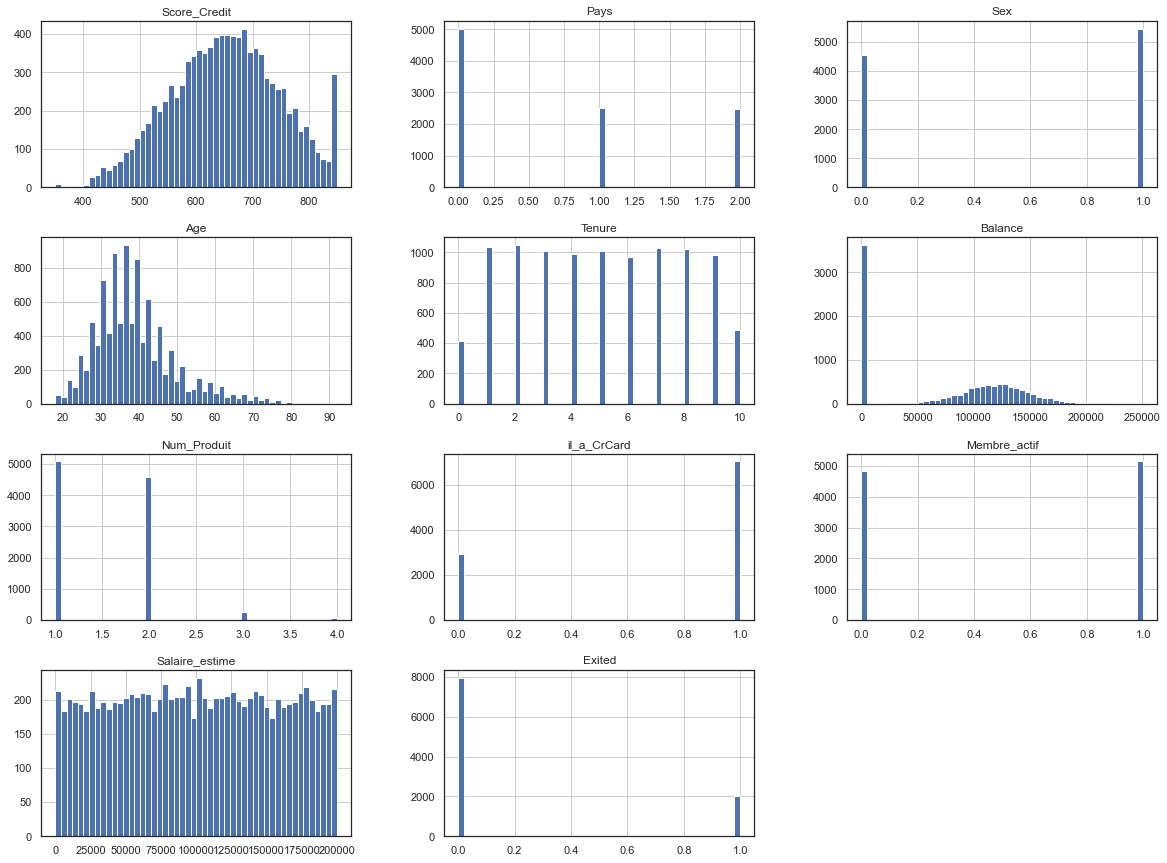

In [22]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
Score_Credit,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Pays,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Sex,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Num_Produit,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
il_a_CrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Membre_actif,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Salaire_estime,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

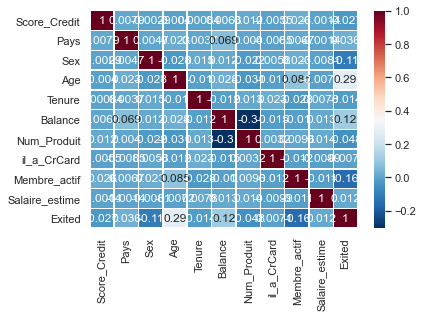

In [24]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

cela confirme qu'il n'y a aucune correlation entre les données

## II -Répartition des données

In [25]:
data.shape

(10000, 11)

In [26]:
X = data.drop(['Exited'], axis=1)

y = data['Exited'].values.reshape(-1,1)


print(X.shape)
print(y.shape)

(10000, 10)
(10000, 1)


In [27]:
#2e méthode
#y = data.iloc[:,-1].values.reshape(-1,1)
#print(y)

#x = data.iloc[:,-14:-1].values
#print(x)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_test.shape, X_train.shape, y_train.shape, y_test.shape)

(2000, 10) (8000, 10) (8000, 1) (2000, 1)


In [29]:
#Normalisation des valeurs de X
scaler = StandardScaler()
print(X_test)
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)
print("=====================================")
print(X_test)
print ("====================================")
print(X_train)


      Score_Credit  Pays  Sex  Age  Tenure    Balance  Num_Produit  \
9394           597     1    0   35       8  131101.04            1   
898            523     0    0   40       2  102967.41            1   
2398           706     2    0   42       8   95386.82            1   
5906           788     0    1   32       4  112079.58            1   
2343           706     1    1   38       5  163034.82            2   
...            ...   ...  ...  ...     ...        ...          ...   
1037           625     0    0   24       1       0.00            2   
2899           586     0    0   35       7       0.00            2   
9549           578     2    1   36       1  157267.95            2   
2740           650     1    1   34       4  142393.11            1   
6690           573     1    1   30       8  127406.50            1   

      il_a_CrCard  Membre_actif  Salaire_estime  
9394            1             1       192852.67  
898             1             0       128702.10  
2398     

cela nous permet de regrouper des valeurs proches dans un intervalle assez réduit

## III- Modele avec une regression logistique

In [30]:
#création du modele
logreg = LogisticRegression(solver='liblinear', random_state=0)

print(y_train.shape)
# on en traine le modèle sur les données d'apprentissage
logreg.fit(X_train, y_train)

(8000, 1)


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

### Prédiction sur l’échantillon test

In [31]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Comparaison de l'accuracy sur l'apprentissage et le test

In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8086
Test set score: 0.8080


nous avons un bon modèle car nous avons les mêmes résultats mais pas assez perfomant car pas assez proche de 1

### AFFICHAGE DE LA MATRICE DE CONFUSION

In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1551   44]
 [ 340   65]]

True Positives(TP) =  1551

True Negatives(TN) =  65

False Positives(FP) =  44

False Negatives(FN) =  340


nous avons 1552 variables bien classées, 65 mal classées, 43 mal classees à tort , 340 considérées comme mal classees alors que c'est bien classé

### imprimer les indicateurs

In [34]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8080


In [35]:
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))



# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))



# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print Specificity score

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8080
Classification error : 0.1920
Precision : 0.9724
Recall or Sensitivity : 0.8202
Specificity : 0.5963


erreur proche de 0  c'est bien 
précision et recall elevés


on voit que notre modèle est performant MAIS PS SUFFISANT

## IV- Modele avec une regression logistique avec PCA

on retire toutes les variables redondantes pour avoir un model plus petit et concentre sur les odnnées essentielles
pour savoir si on va avoir des meilleurs résultats =>  maxmiser la variance

Afin de réduire la dimensionnalité des données, appliquez la méthode PCA sur les données (X) en choisissant un nombre de composants de 2. 

In [36]:
pca_log = PCA(n_components=2)
X_train_pca = pca_log.fit_transform(X_train)

logreg.fit(X_train_pca, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [37]:
X_test_pca = pca_log.fit_transform(X_test)

logreg.fit(X_test_pca, y_test)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [38]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train_pca, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_pca, y_test)))

Training set score: 0.7960
Test set score: 0.7975


Les résultats avec PCA sont moins bons que sans  PCA pour la regression logistique.

## V-  Modèle Random  Forest sans PCA

In [39]:
reg_rcf = RandomForestClassifier(random_state=42)
reg_rcf.fit(X_train, y_train)

<ipython-input-39-dc0cb59b7589>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rcf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [40]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(reg_rcf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(reg_rcf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8640


cette méthode révèle un risque de surapprentissage. (révélateur de la réalité?)

## VI-Modèle Random  Forest avec PCA

In [41]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

reg_rcf.fit(X_train_pca, y_train)

<ipython-input-41-ae5151e4929a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rcf.fit(X_train_pca, y_train)


RandomForestClassifier(random_state=42)

In [42]:
X_test_pca = pca.transform(X_test)


In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(reg_rcf.score(X_train_pca, y_train)))

print('Test set score: {:.4f}'.format(reg_rcf.score(X_test_pca, y_test)))

Training set score: 0.9999
Test set score: 0.7780


Le Random Forest sans PCA se revèle plus performant qu'avec PCA.

## VII-Reseau de neurones

#Initialisation du modèle avec un nombre de neureones par couche et un optimiser.

nous sommes dans une étude binaire : désabonement oui ou non 

#fonction RELU :fonction linéaire par morceaux. Son avantage réside sur le fait qu'elle
remplace toute valeur d'entrée négative par 0 et toute valeur positive par elle même, soit
max(0,x).Cette fonction casse la linéarité des valeurs négatives et désactive certains
neurones.

#fonctions d’activation - Sigmoïde
prend une valeur réelle en entrée et la transforme en une valeur réelle de
sortie comprise entre 0 et 1

In [49]:

model = models.Sequential()
model.add(layers.Dense(13, kernel_initializer = "uniform", activation='relu', input_shape=(10,)))
model.add(layers.Dense(26, kernel_initializer = "uniform", activation='relu'))
model.add(layers.Dense(1, kernel_initializer = "uniform",  activation='sigmoid'))

In [50]:


model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                143       
_________________________________________________________________
dense_4 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Les optimizer vont façonner et modeler les modèles dans leur forme la plus précise possible en utilisant les poids synaptiques
#

In [52]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

#entrainement du modele avec la fonction fit, le nombre d'epoque(combien de fois on parcours le jeu de données)

In [53]:


history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.7948 - val_loss: 0.4246 - val_accuracy: 0.8150
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8207 - val_loss: 0.4107 - val_accuracy: 0.8335
Epoch 3/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4275 - accuracy: 0.8222 - val_loss: 0.4020 - val_accuracy: 0.8365
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4069 - accuracy: 0.8346 - val_loss: 0.3971 - val_accuracy: 0.8425
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3985 - accuracy: 0.8361 - val_loss: 0.3957 - val_accuracy: 0.8400
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4028 - accuracy: 0.8329 - val_loss: 0.3979 - val_accuracy: 0.8370
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3988 - accuracy: 0.8345 - val_loss: 0.3983 - val_accuracy: 0.8395
Epoch 

In [54]:
# Evaluation des performances du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
# on imprime la performance du modèle
print('\nTest accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8385

Test accuracy: 0.8385000228881836


In [55]:

pred = model.predict(X_test)
pred = (pred > 0.50)



In [56]:
conf = confusion_matrix(y_test, pred)

<AxesSubplot:>

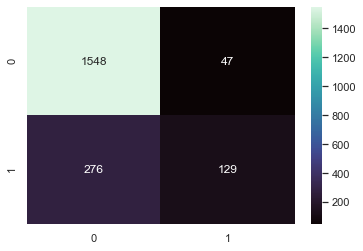

In [57]:
sb.heatmap(conf, cmap='mako', annot=True, fmt='d')

Au final le jeu de neurones montre que le nombre d'abonné ne souhaitant pas se désabonner est plutôt bien classé (1538) .

# CONCLUSION

Le modele du Random Forest sans PCA semble le plus pertinant de tous les modèles que nous avons expérimenté avec un score de 0,86 pour le jeu de test.

Les méthodes avec PCA nous donnent des résultats moins performants que les méthodes sans pca (lien à effet à la réduction de dimentionalité? ) et que celui du jeu de neurone.
